In [1]:
### Code written by Adhika
### Last modified Apr,30 2023 by Fandi

#Read data from CD_Time.dat, and plot time histories of CD and CL
Input_File = "cd_time.dat"

Reading Data
Plotting (Raw) Data
Initial time =  0.1
Total time =  800.0001


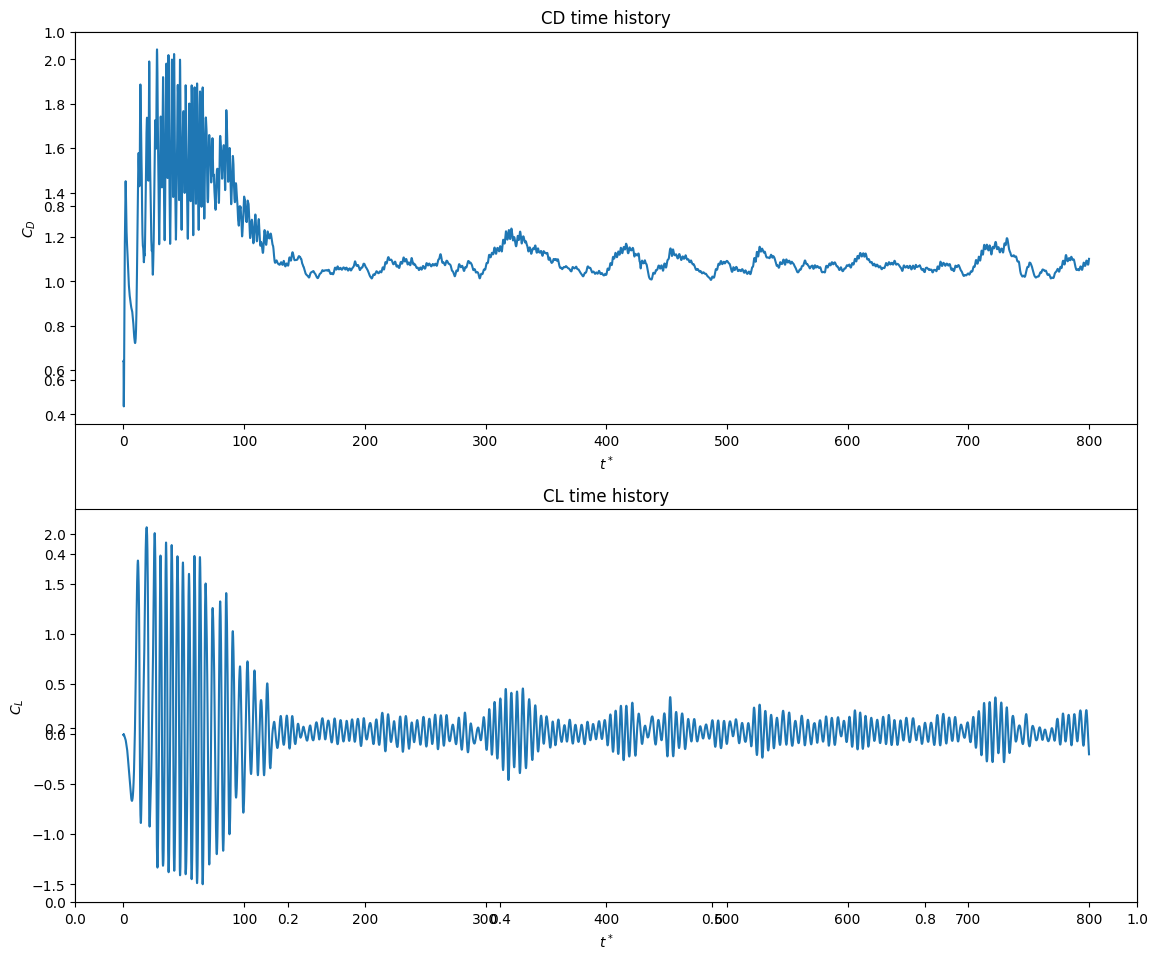

In [2]:
### Code written by Adhika
### Last modified Apr,30 2023 by Fandi

#Read data from CD_Time.dat, and plot time histories of CD and CL

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

print("Reading Data")
Time_Data = np.loadtxt(Input_File, usecols=0, skiprows=2, unpack=True)
Cd_Data = np.loadtxt(Input_File, usecols=1, skiprows=2, unpack=True)
Cl_Data = np.loadtxt(Input_File, usecols=2, skiprows=2, unpack=True)
Total_Data = len(Time_Data)

print("Plotting (Raw) Data")
print("Initial time = ",Time_Data[0])
print("Total time = ",Time_Data[Total_Data-1])
plt.subplots(figsize=(12, 10))

plt.subplot(2, 1, 1)  # row 1, column 2, count 1
plt.plot(Time_Data, Cd_Data)
plt.title('CD time history')
plt.xlabel('$t^*$')
plt.ylabel('$C_D$')    

plt.subplot(2, 1, 2)
plt.plot(Time_Data, Cl_Data)
plt.title('CL time history')
plt.xlabel('$t^*$')
plt.ylabel('$C_L$')

plt.tight_layout()
plt.savefig("CD_CL_Raw.png", bbox_inches='tight', dpi=300)
plt.show()

In [3]:
#Calculate the mean values with a progressive interval from Start_Time
#Plot the mean values wrt. the time interval from Start_Time.
Start_Time = 60

Processing Data: 100%|████████████████| 740000/740000 [01:45<00:00, 7022.37it/s]


Saving Data
Plotting Data


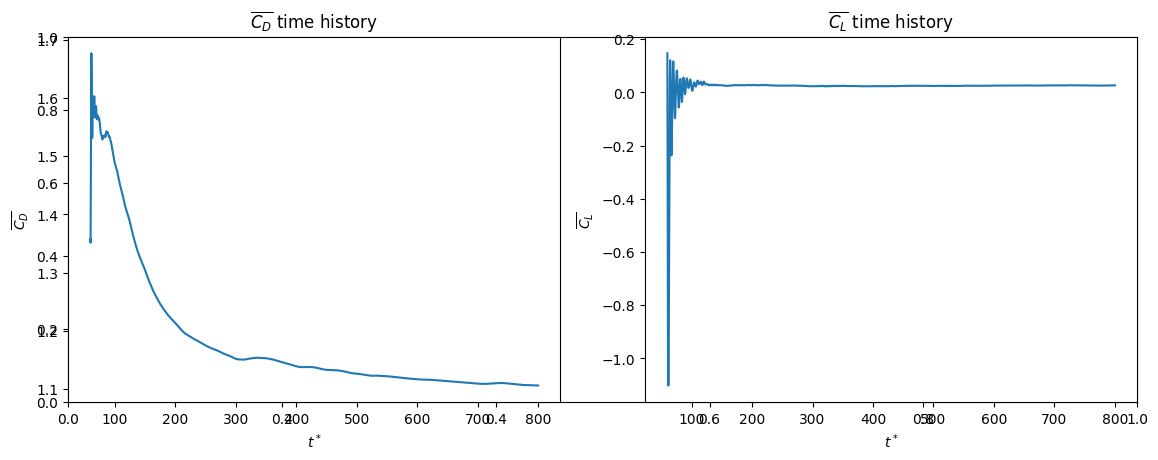

Final CD average =  1.1061259213094599
Final CL average =  0.02626313050903622


In [4]:
#Calculate the mean values with a progressive interval from Start_Time
#Plot the mean values wrt. the time interval from Start_Time.


Start_Index = 0
while Time_Data[Start_Index] < Start_Time:
    Start_Index += 1

Cd_Avg =[]
Cl_Avg =[]
for i in tqdm(range(Start_Index + 1, Total_Data),desc="Processing Data"):
#for i in range(Start_Index + 1, Total_Data):
    Cd_Avg.append(np.mean(Cd_Data[Start_Index:i]))
    Cl_Avg.append(np.mean(Cl_Data[Start_Index:i]))

    
Cd_Avg = np.asarray(Cd_Avg)
Cl_Avg = np.asarray(Cl_Avg)
print("Saving Data")
np.savetxt("CD_Avg.txt", Cd_Avg, delimiter='\t')
np.savetxt("CL_Avg.txt", Cl_Avg, delimiter='\t')

print("Plotting Data")
plt.subplots(figsize=(12, 5))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.plot(Time_Data[Start_Index + 1:Total_Data], Cd_Avg)
plt.title('$\overline{C_D}$ time history')
plt.xlabel('$t^*$')
plt.ylabel('$\overline{C_D}$')    

plt.subplot(1, 2, 2)
plt.plot(Time_Data[Start_Index + 1:Total_Data], Cl_Avg)
plt.title('$\overline{C_L}$ time history')
plt.xlabel('$t^*$')
plt.ylabel('$\overline{C_L}$')

plt.tight_layout()
plt.savefig("CD_CL_Avg.png", bbox_inches='tight', dpi=300)
plt.show()

print("Final CD average = ",Cd_Avg[len(Cd_Avg)-1])
print("Final CL average = ",Cl_Avg[len(Cl_Avg)-1])

In [5]:
# DEBUG
#Cl_Avg = np.asarray(Cl_Avg)
#print(Time_Data.shape)
#print(Cl_Avg.shape)
#plt.plot(Time_Data[109875:Total_Data], Cl_Avg[109875:Total_Data])
#plt.show()

In [6]:
#Extrapolate the data to find the converged values of CD and CL as the time goes to infinity
#Credited to: Adhika

def p_Calc(h, f):
    Initial_Guess = 1.
    Converge_Criteria = 1e-6
    Error = 1
    Iter_Limit = 10e+4
    Iter = 0

    # Preperation
    p = Initial_Guess
    r12 = h[1] / h[0]
    r23 = h[2] / h[1]
    f2f1 = f[1] / f[0]
    f3f1 = f[2] / f[0]
    f_Ratio = (f3f1 - f2f1) / (f2f1 - 1)
    r_Param = np.log(r12 * r23)

    while Error > Converge_Criteria:
        Iter += 1
        Last_P = p
        DummyVar02 = r12 ** Last_P
        DummyVar03 = np.log((DummyVar02 - 1) * f_Ratio + DummyVar02)
        p = DummyVar03 / r_Param
        #print(p)
        Error = np.abs(p / Last_P - 1)

        if Iter == Iter_Limit:
            print("Order of accuracy calculation does not converge")
            exit()

    return p


def Calc_Range_Grad(h, f):
    g12 = (f[1] - f[0]) / (h[1] - h[0])
    g23 = (f[2] - f[1]) / (h[2] - h[1])
    r23 = h[2] / h[1]
    h12max = 0.5 * (h[0] + h[1])
    h23min = (5 * r23 + 7.)/(r23 + 11.)/(r23 + 1.) * (h[2] - h[1]) + h[1]
    Inv_Val = 1./g12 - (1./g23 - 1./g12) / (h23min/h12max - 1.)
    g0 = 1./Inv_Val

    if 1.1 * abs(g12) <= abs(g23) and g0 * g12 > 0:
        Val_Range = [f[0] - g12 * h[0], f[0]]
    elif 1.1 * abs(g12) > abs(g23) and g0 * g12 > 0:
        Val_Range = [f[0] - (g12 + g0)/2. * h12max, f[0]]
    else:
        Val_Range = [-99 * f[0], 101. * f[0]]
    
    return Val_Range

In [7]:
#Extrapolate the data to find the converged values of CD and CL as the time goes to infinity
#Calculate discrepancies between final CD and CL and their extrapolated values
#Estimate the time needed to reach a certain percentage error of the extrapolated value. Default = 5% 
#Credited to: Adhika
err_percent = 5 #Expected percentage error of the extrapolated value

Extrapolating Data


/tmp/ipykernel_377959/2280771156.py:27: RuntimeWarning: invalid value encountered in scalar divide
  Error = np.abs(p / Last_P - 1)
/tmp/ipykernel_377959/2718093930.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  Error_Estimate_Cl = (Cl_Sample[1] - Cl_Sample[0])/(r12 ** p_Cl - 1)
/tmp/ipykernel_377959/2718093930.py:32: RuntimeWarning: invalid value encountered in scalar divide
  err_final_Cl = 100.*abs(Cl_Sample[1]-Cl_Sample[0])/Cl_Sample[0]


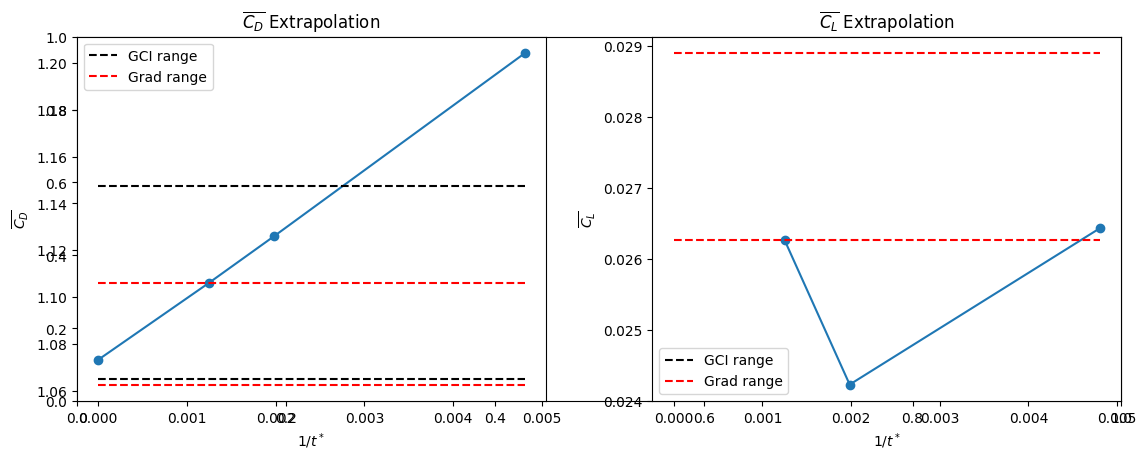

Extrapolated CD =  1.0732573778592078
Extrapolated CL =  inf
 
The error of final CD & CL with respect to their extrapolated values:
   Final CD average error =  3.063 %
   Final CL average error =  nan %
 
The suggested simulation time to reach  5 % error of the extrapolated value:
   The existing CD error is already < 5 %
   The existing CL error is already < 5 %


In [8]:
print("Extrapolating Data")
Total_Data2 = len(Cd_Avg)
h = 1./Time_Data[Start_Index:Total_Data]
#Sampling_Points = [Total_Data2*50//100, Total_Data2*75//100, Total_Data2-1]    # 50%, 75%, 100%
Sampling_Points = [Total_Data2*20//100, Total_Data2*60//100, Total_Data2-1]    # 20%, 60%, 100%
h_Sample = [h[Sampling_Points[2]], h[Sampling_Points[1]], h[Sampling_Points[0]]]
Cd_Sample = [Cd_Avg[Sampling_Points[2]], Cd_Avg[Sampling_Points[1]], Cd_Avg[Sampling_Points[0]]]
Cl_Sample = [Cl_Avg[Sampling_Points[2]], Cl_Avg[Sampling_Points[1]], Cl_Avg[Sampling_Points[0]]]

# Order of accuracy
p_Cd = p_Calc(h_Sample, Cd_Sample)
p_Cl = p_Calc(h_Sample, Cl_Sample)

# Extrapolate
r12 = h_Sample[1] / h_Sample[0]
Error_Estimate_Cd = (Cd_Sample[1] - Cd_Sample[0])/(r12 ** p_Cd - 1)
Error_Estimate_Cl = (Cl_Sample[1] - Cl_Sample[0])/(r12 ** p_Cl - 1)

# Range
Cd_Range_GCI = [Cd_Sample[0] - 1.25 * Error_Estimate_Cd, Cd_Sample[0] + 1.25 * Error_Estimate_Cd]
Cl_Range_GCI = [Cl_Sample[0] - 1.25 * Error_Estimate_Cl, Cl_Sample[0] + 1.25 * Error_Estimate_Cl]
Cd_Range_Grad = Calc_Range_Grad(h_Sample, Cd_Sample)
Cl_Range_Grad = Calc_Range_Grad(h_Sample, Cl_Sample)

# Insert extrapolated point
h_Sample.insert(0, 0.)
Cd_Sample.insert(0, Cd_Sample[0] - Error_Estimate_Cd)
Cl_Sample.insert(0, Cl_Sample[0] - Error_Estimate_Cl)

# Calculating discrepancies between final CD and CL and their extrapolated values
err_final_Cd = 100.*abs(Cd_Sample[1]-Cd_Sample[0])/Cd_Sample[0]
err_final_Cl = 100.*abs(Cl_Sample[1]-Cl_Sample[0])/Cl_Sample[0]

# Estimated time needed to reach a certain percentage error of the extrapolated value. Default = 5% 
Cd_est_time = np.ceil(abs((100.*(Cd_Sample[1]-Cd_Sample[0]))/(err_percent*Cd_Sample[1]*h_Sample[1])))
Cl_est_time = np.ceil(abs((100.*(Cl_Sample[1]-Cl_Sample[0]))/(err_percent*Cl_Sample[1]*h_Sample[1])))

# Plot
plt.subplots(figsize=(12, 5))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.plot(h_Sample, Cd_Sample, marker = 'o')
plt.plot([0., h_Sample[3]], [Cd_Range_GCI[0], Cd_Range_GCI[0]], c = 'black', linestyle = 'dashed', label='GCI range')
plt.plot([0., h_Sample[3]], [Cd_Range_GCI[1], Cd_Range_GCI[1]], c = 'black', linestyle = 'dashed')
plt.plot([0., h_Sample[3]], [Cd_Range_Grad[0], Cd_Range_Grad[0]], c = 'r', linestyle = 'dashed', label='Grad range')
plt.plot([0., h_Sample[3]], [Cd_Range_Grad[1], Cd_Range_Grad[1]], c = 'r', linestyle = 'dashed')
plt.legend()
plt.title('$\overline{C_D}$ Extrapolation')
plt.xlabel('$1/t^*$')
plt.ylabel('$\overline{C_D}$')

plt.subplot(1, 2, 2)
plt.plot(h_Sample, Cl_Sample, marker = 'o')
plt.plot([0., h_Sample[3]], [Cl_Range_GCI[0], Cl_Range_GCI[0]], c = 'black', linestyle = 'dashed', label='GCI range')
plt.plot([0., h_Sample[3]], [Cl_Range_GCI[1], Cl_Range_GCI[1]], c = 'black', linestyle = 'dashed')
plt.plot([0., h_Sample[3]], [Cl_Range_Grad[0], Cl_Range_Grad[0]], c = 'r', linestyle = 'dashed', label='Grad range')
plt.plot([0., h_Sample[3]], [Cl_Range_Grad[1], Cl_Range_Grad[1]], c = 'r', linestyle = 'dashed')
plt.legend()
plt.title('$\overline{C_L}$ Extrapolation')
plt.xlabel('$1/t^*$')
plt.ylabel('$\overline{C_L}$')

plt.tight_layout()
plt.show()

print("Extrapolated CD = ",Cd_Sample[0])
print("Extrapolated CL = ",Cl_Sample[0])
print(" ")
print("The error of final CD & CL with respect to their extrapolated values:")
print("   Final CD average error = ",round(err_final_Cd,3),"%")
print("   Final CL average error = ",round(err_final_Cl,3),"%")
print(" ")
print("The suggested simulation time to reach ", err_percent, "% error of the extrapolated value:")
if err_final_Cd > err_percent:
    print("   Based on extrapolated CD = ", Cd_est_time," unit time")
else:
    print("   The existing CD error is already <", err_percent,"%")  
if err_final_Cl > err_percent:
    print("   Based on extrapolated CL = ", Cl_est_time," unit time")
else:
    print("   The existing CL error is already <", err_percent,"%")  